In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

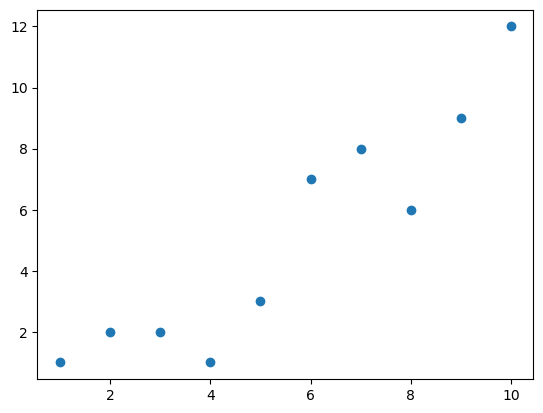

In [9]:
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [1,2,2,1,3,7,8,6,9,12]
plt.scatter(x_data, y_data)
plt.show()


In [10]:
data = list(zip(x_data,y_data))
model = KMeans(n_clusters=2)
model.fit(data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [14]:
labels = model.labels_
print("Cluster labels=",labels)
new_data = [(3,1),(10,20)]
print("New Data=",new_data)
print("Predicted Class labels")
model.predict(new_data)

Cluster labels= [1 1 1 1 1 0 0 0 0 0]
New Data= [(3, 1), (10, 20)]
Predicted Class labels


array([1, 0])